Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
#importing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# Reading titanic data
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [101]:
#new column cabin class with names
titanic['cabin_class'] = titanic['Pclass'].map({1:'first', 2: 'second', 3:'third'})
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


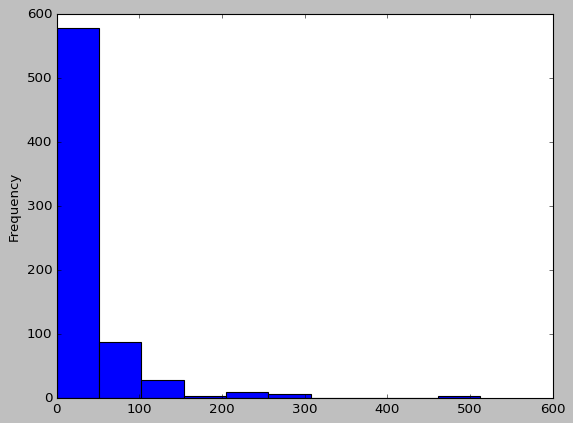

In [102]:
#ploting fare
titanic['Fare'].plot(kind='hist');

In [104]:
# converting fare intobins
farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high','vhigh']
titanic['fare_groups']= pd.cut(titanic['Fare'], bins=farebins, labels=farelabels)
results = titanic['fare_groups'].value_counts().sort_index()
results

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

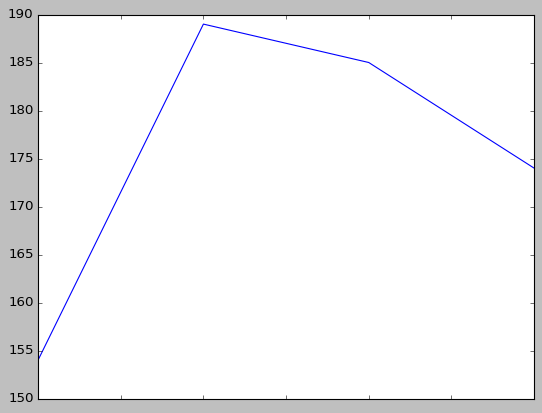

In [109]:
results.plot();

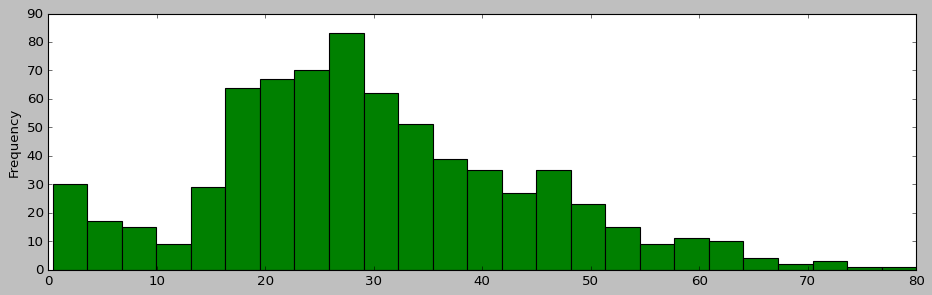

In [112]:
# ploting single continues varible
titanic['Age'].plot(kind='hist', bins=25, figsize=(14,4), color='green');

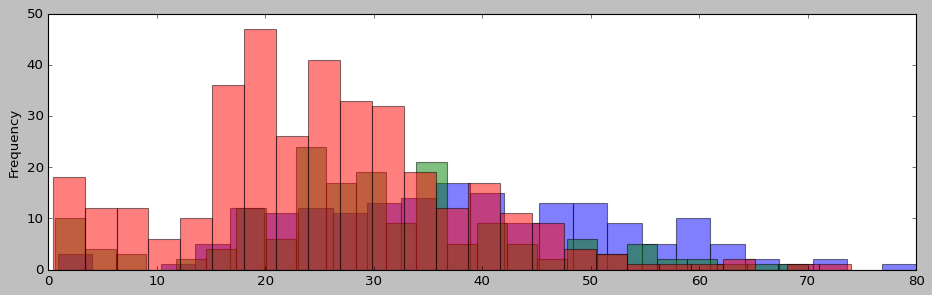

In [114]:
# Stacked Histogram broken out by categorical variable
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);

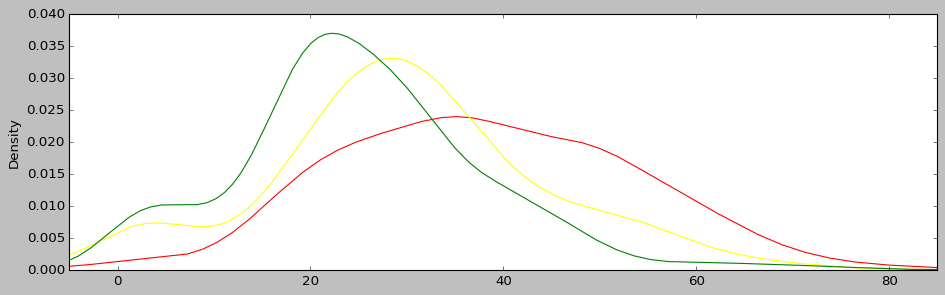

In [116]:
# using Kernel Density Estimate (KDE) and the use of 'xlim'.
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(14,4), color='red')
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(14,4), color='yellow')
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(14,4), color='green');

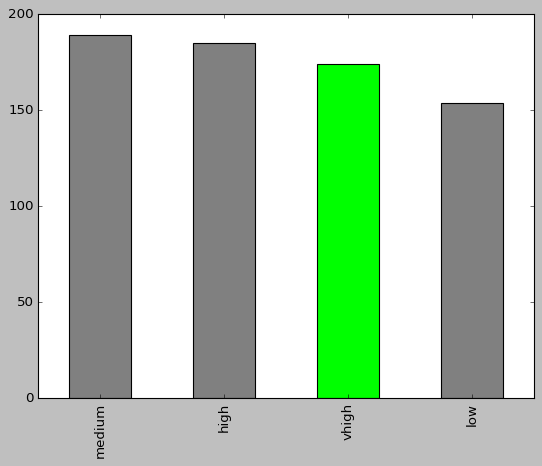

In [117]:
# bar chart poping out one column
titanic['fare_groups'].value_counts().plot(kind='bar', color=['gray', 'gray', 'lime', 'gray']);

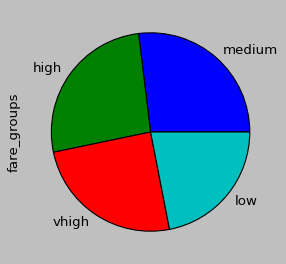

In [118]:
# Pie chart
titanic['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [119]:
# Comparing two categorical variables using crosstab
cab_death = pd.crosstab(titanic['cabin_class'],titanic['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,120
second,90,83
third,270,85


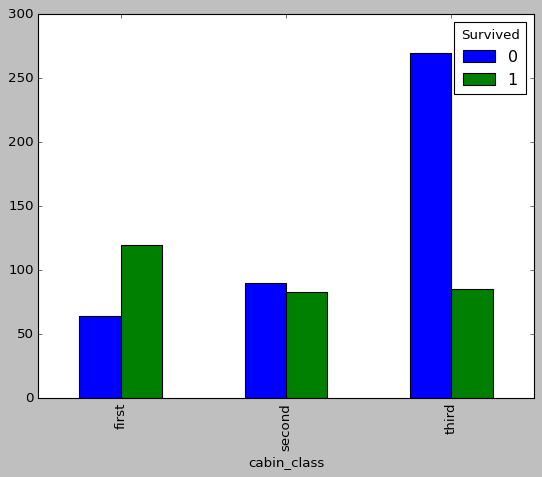

In [121]:
#displaying in bar chart
cab_death.plot(kind='bar')

In [124]:
#Crosstab with column percents.
cab_death1 = pd.crosstab(titanic['cabin_class'],titanic['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.416667
second,0.212264,0.288194
third,0.636792,0.295139


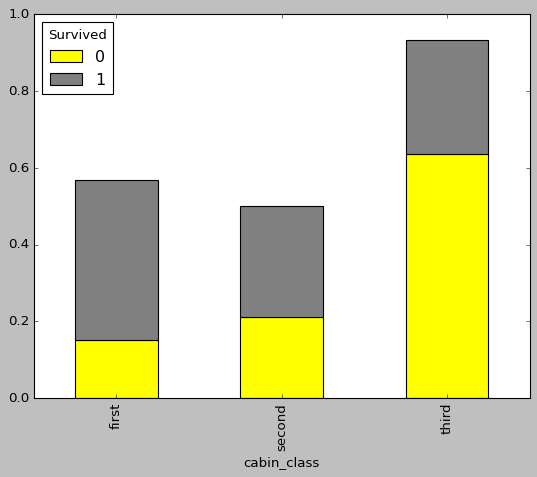

In [125]:
#making a stacked bar chart, for easy comparison of two categorical variables.
cab_death1.plot(kind='bar', stacked=True, color=['yellow', 'gray']);

In [126]:
# Crosstab with column percents.
cab_death2 = pd.crosstab(titanic['cabin_class'],titanic['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.347826,0.652174
second,0.520231,0.479769
third,0.760563,0.239437


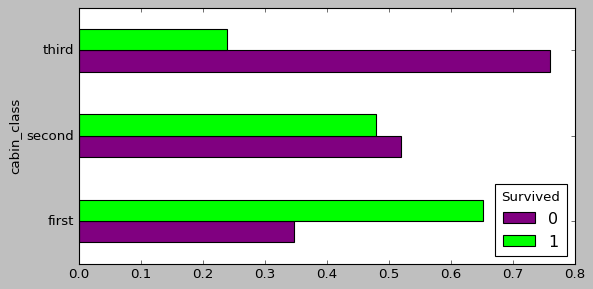

In [127]:
# bar chart h to compare to catagoriacal variables
cab_death2.plot(kind='barh', color=['purple', 'lime'], figsize=(8,4));

In [128]:
# Now explore that continuous variable broken out by a categorical variable.
cab_age = titanic.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.105543
second    29.877630
third     25.140620
Name: Age, dtype: float64

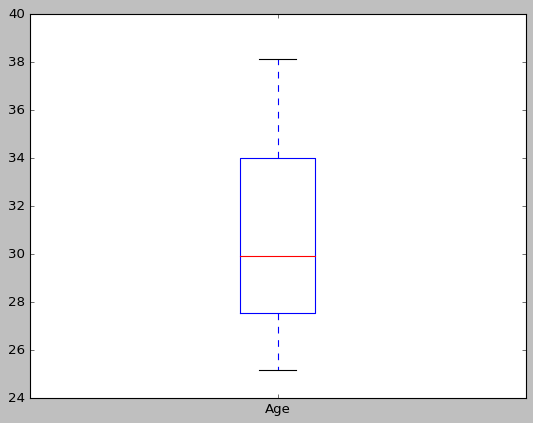

In [130]:
cab_age.plot(kind='box');

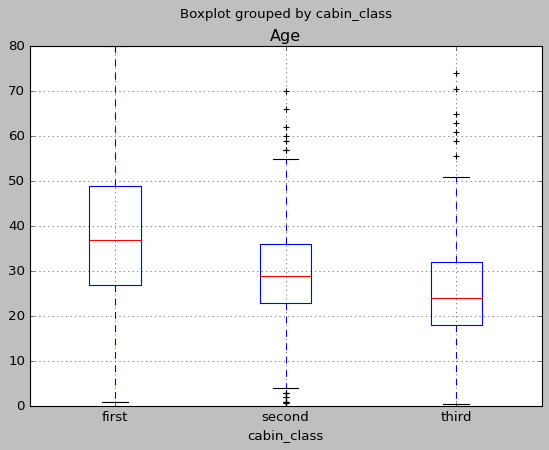

In [132]:
#using `.boxplot`to breakout continues variable
titanic.boxplot(column='Age', by='cabin_class');

**What Do Men Think It Means To Be A Man?**

In [171]:
df=pd.read_csv('daily_show_guests.csv')

df.head(3)

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman


In [169]:
df.shape

(2693, 5)

In [188]:
df['Group'].value_counts()


Acting            930
Media             751
Politician        308
Comedy            150
Musician          123
Academic          103
Athletics          52
Misc               45
Government         40
Political Aide     36
Science            28
Business           25
Advocacy           24
Consultant         18
Military           16
Clergy              8
media               5
Name: Group, dtype: int64

In [193]:
df['New_Group']= df['Group'].map({'Acting':'Acting,Comedy & Music','Comedy':'Acting,Comedy & Music','Musician':'Acting,Comedy & Music',
                                  'media':'Media','Media':'Media','Political Aide':'Government And Politics','Politician':'Government And Politics',
                                  'Government':'Government And Politics'})
df['New_Group'].value_counts()

Acting,Comedy & Music      1203
Media                       756
Government And Politics     384
Name: New_Group, dtype: int64

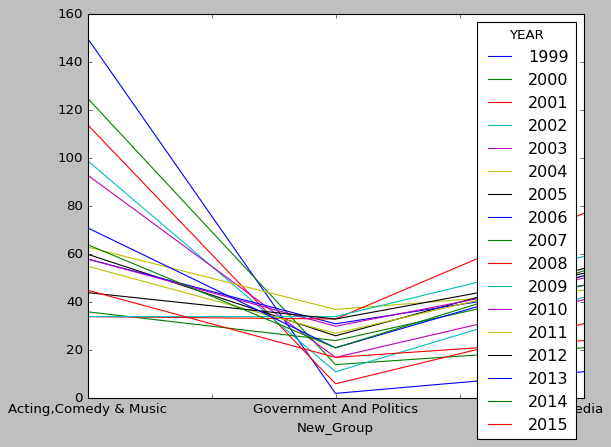

In [196]:
pd.crosstab(df['New_Group'],df['YEAR']).plot()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here